# Geoprocessing

In [4]:
import ouroboros as ob
import geopandas as gpd

import ouroboros._geoprocessing

# large dataset of US National Highway System roads
# https://hepgis-usdot.hub.arcgis.com/datasets/dce9f09392eb474c8ad8e6a78416279b_0
fc1 = ob.FeatureClass("NHS.gdb/National_Highway_System__NHS_")
f"{len(fc1)} rows"

'491781 rows'

In [5]:
# filter by route ID
route = "  I 017"
field_name = "ROUTEID"
column_index = fc1.list_fields().index(field_name)

filtered = list()
for row in fc1:
    if row[column_index] == route:
        filtered.append(row)

fc2 = ob.FeatureClass(gpd.GeoDataFrame(filtered))
f"{len(fc2)} rows where ROUTEID == '{route}'"

"100 rows where ROUTEID == '  I 017'"

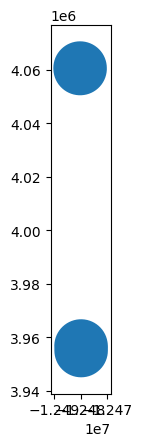

In [6]:
# buffer with GeoPandas
gdf_buf = ouroboros._geoprocessing.buffer(fc2, 10000)
gdf_buf.show()

In [7]:
# Load results into a new feature class and geodatabase in memory
fc3 = ob.FeatureClass(gdf_buf)
gdb = ob.GeoDatabase()
gdb["NHS_selection_buffered"] = fc3

In [8]:
# Save to disk
gdb.save("NHS_selection.gdb", overwrite=True)
ob.list_datasets("NHS_selection.gdb")

{None: ['NHS_selection_buffered']}